In [6]:
import import_ipynb
from InsertsDelComparisons import sorted_users, np, df, INDICES, map_, pd, recipes_indices, indices_of_first_attempts_per_user

In [11]:
def print_user_recipes(index):
    print(sorted_users[index])
    a = np.where(df['user_id'] == sorted_users[index])
    a = a[0]
    for i in a:
        print(df['recipe'].iloc[i][:20], df['event_date'].values[i])
    print(map_[index])

In [4]:
actions = [None] *len(df)
for arrays in map_:
    actions[arrays[0]] = '1st recipe submitted'
for i in range(len(df)):
    if actions[i] is None:
        if i in recipes_indices:
            actions[i] = 'next recipe submitted'
        else:  
            actions[i] = 'revision'

In [9]:
ACTIONS = [';1st recipe submitted;', ';revision;', ';next recipe submitted;']
def recipes_to_csv(user_index):
    recipe_indices = map_[user_index].copy()
    if user_index == 186: last_index_where_written = 1091
    else: last_index_where_written = indices_of_first_attempts_per_user[user_index + 1]
    recipe_indices.append(last_index_where_written)
    print(recipe_indices)

    where_in_df = np.where(df['user_id'] == sorted_users[user_index])
    first_line = '1' + ACTIONS[0] + df.iloc[where_in_df[0][0]]['event_date']

    lines = [first_line]

    for i, index in enumerate(range(recipe_indices[0]+1, recipe_indices[-1]+1)):
        j = index
        is_new_recipe = index in recipe_indices
        while not is_new_recipe:
            line = ACTIONS[1] + df.iloc[where_in_df[0][i+1]]['event_date']
            lines.append(line)
            j+=1
            if j in recipe_indices: is_new_recipe = True

        try:
            if index in recipe_indices : lines.append(ACTIONS[2] + df.iloc[where_in_df[0][i+1]]['event_date'])
        except: continue
        
    result = lines
    index = 1
    for i, line in enumerate(lines):
        if line.startswith(ACTIONS[1]):
            result[i] = str(index) + line
        elif line.startswith(ACTIONS[2]):
            index+=1
            result[i] = str(index) + line

    return result

[9, 11, 12, 14]


['1;1st recipe submitted;2022-09-04 14:01:31.746981',
 '1;revision;2022-09-04 14:09:42.474719',
 '2;next recipe submitted;2022-09-04 14:25:32.108391',
 '3;next recipe submitted;2022-09-04 14:43:38.306892',
 '3;revision;2022-09-04 14:48:49.568420']

In [ ]:
import os
import pm4py
from pm4py.visualization.petri_net import  visualizer as pn_vis_factory

name = 'running-example.csv'
test = 'test.csv'
dataframe = pd.read_csv(test, sep=';')
event_log = pm4py.format_dataframe(dataframe, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
event_log = pm4py.convert_to_event_log(dataframe)


new_file = 'xes_format.xes'
pm4py.write_xes(event_log, new_file)

log = pm4py.read_xes(new_file)
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)
print(final_marking.elements)

#pn_vis_factory(pn_vis_factory.apply(net, initial_marking, final_marking))

parsing log, completed traces :: 100%|██████████| 3/3 [00:00<?, ?it/s]

<bound method Counter.elements of ['end:1']>


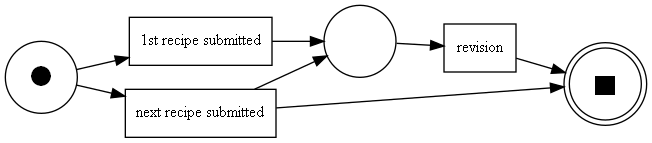

In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import  algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_vis_factory

performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log)
pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, 'perf_dfg.png')



net, im, fm = alpha_miner.apply(log)
gv = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gv)